In [2]:
##import libraries
import pandas as pd
import numpy as np
import os
import glob
from functools import reduce

In [3]:
##path to our dataset
root_path = 'C:\\Users\\mulug\\OneDrive\\Documents\\Datasets\\'

In [9]:
def data_extraction(year, path, enc = 'utf-8'):
    
    ##list of target drug names
    target_drugs = ['xenical', 'alli', 'orlistat', 'liraglutide', 'saxenda']
    
    ##path to q1 ascii files
    q1_path = path + str(year)+"/faers_ascii_"+str(year)+"q1" + "/ASCII/"

    ##read demo data
    q1_DEMO = pd.read_csv(q1_path+f'DEMO{year%100}Q1.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read drug data
    q1_DRUG = pd.read_csv(q1_path+f'DRUG{year%100}Q1.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read indication data
    q1_INDI = pd.read_csv(q1_path+f'INDI{year%100}Q1.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read outcome data
    q1_OUTC = pd.read_csv(q1_path+f'OUTC{year%100}Q1.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read reaction data
    q1_REAC = pd.read_csv(q1_path+f'REAC{year%100}Q1.txt', delimiter = '$', dtype = str, encoding = enc)
    
    ##read therapy data
    q1_THER = pd.read_csv(q1_path+f'THER{year%100}Q1.txt', delimiter = '$', dtype = str, encoding = enc)
    
    #DEMO data copy
    merged_df1 = q1_DEMO.copy()
    
    ##aggregate multiple outcomes per report into a list
    outcome_agg = q1_OUTC.groupby("primaryid")["outc_cod"].apply(list).reset_index()
    
    ##merge the aggregated outcome data into merged_df1
    merged_df1 = merged_df1.merge(outcome_agg, on = ['primaryid'], how = 'left')
    
    ##aggregate multiple reactions per report into a list
    reac_agg = q1_REAC.groupby("primaryid")["pt"].apply(list).reset_index()
    
    ##merge the aggregated reaction data to merged_df1
    merged_df1 = merged_df1.merge(reac_agg, on = ['primaryid'], how = 'left')
    
    ##filter the target drugs
    q1_DRUG_filtered = q1_DRUG.loc[q1_DRUG['drugname'].str.lower().isin(target_drugs)]


    # Merge drug with indication using primaryid, caseid and drug_seq ↔ indi_drug_seq
    drug_indi = q1_DRUG_filtered.merge(q1_INDI, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "indi_drug_seq"], how="left")
    
    # Merge drug_indi with q1_THER using primaryid, caseid and drug_seq ↔ dsg_drug_seq
    drug_indi_ther = drug_indi.merge(q1_THER, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "dsg_drug_seq"], how="left")
    
    ##merge the drug_indi_ther to merged_df1
    merged_df1 = merged_df1.merge(drug_indi_ther, on = ['primaryid', 'caseid'], how = 'inner')
    
    #######################
    
    ##path to q2 ascii files
    q2_path = path + str(year)+"/faers_ascii_"+str(year)+"q2" + "/ASCII/"

    ##read demo data
    q2_DEMO = pd.read_csv(q2_path+f'DEMO{year%100}Q2.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read drug data
    q2_DRUG = pd.read_csv(q2_path+f'DRUG{year%100}Q2.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read indication data
    q2_INDI = pd.read_csv(q2_path+f'INDI{year%100}Q2.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read outcome data
    q2_OUTC = pd.read_csv(q2_path+f'OUTC{year%100}Q2.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read reaction data
    q2_REAC = pd.read_csv(q2_path+f'REAC{year%100}Q2.txt', delimiter = '$', dtype = str, encoding = enc)
    
    ##read therapy data
    q2_THER = pd.read_csv(q2_path+f'THER{year%100}Q2.txt', delimiter = '$', dtype = str, encoding = enc)
    

    #DEMO data copy
    merged_df2 = q2_DEMO.copy()
    
    ##aggregate multiple outcomes per report into a list
    outcome_agg = q2_OUTC.groupby("primaryid")["outc_cod"].apply(list).reset_index()
    
    ##merge the aggregated outcome data into merged_df2
    merged_df2 = merged_df2.merge(outcome_agg, on = ['primaryid'], how = 'left')
    
    ##aggregate multiple reactions per report into a list
    reac_agg = q2_REAC.groupby("primaryid")["pt"].apply(list).reset_index()
    
    ##merge the aggregated reaction data to merged_df2
    merged_df2 = merged_df2.merge(reac_agg, on = ['primaryid'], how = 'left')
    
    ##filter the target drugs
    q2_DRUG_filtered = q2_DRUG.loc[q2_DRUG['drugname'].str.lower().isin(target_drugs)]


    # Merge drug with indication using primaryid, caseid and drug_seq ↔ indi_drug_seq
    drug_indi = q2_DRUG_filtered.merge(q2_INDI, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "indi_drug_seq"], how="left")
    
    # Merge drug_indi with q2_THER using primaryid, caseid and drug_seq ↔ dsg_drug_seq
    drug_indi_ther = drug_indi.merge(q2_THER, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "dsg_drug_seq"], how="left")
    
    ##merge the drug_indi_ther to merged_df2
    merged_df2 = merged_df2.merge(drug_indi_ther, on = ['primaryid', 'caseid'], how = 'inner')

    
    ########################
    
    ##path to q3 ascii files
    q3_path = path + str(year)+"/faers_ascii_"+str(year)+"q3" + "/ASCII/"

    ##read demo data
    q3_DEMO = pd.read_csv(q3_path+f'DEMO{year%100}Q3.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read drug data
    q3_DRUG = pd.read_csv(q3_path+f'DRUG{year%100}Q3.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read indication data
    q3_INDI = pd.read_csv(q3_path+f'INDI{year%100}Q3.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read outcome data
    q3_OUTC = pd.read_csv(q3_path+f'OUTC{year%100}Q3.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read reaction data
    q3_REAC = pd.read_csv(q3_path+f'REAC{year%100}Q3.txt', delimiter = '$', dtype = str, encoding = enc)
    
    ##read therapy data
    q3_THER = pd.read_csv(q3_path+f'THER{year%100}Q3.txt', delimiter = '$', dtype = str, encoding = enc)
    

    #DEMO data copy
    merged_df3 = q3_DEMO.copy()
    
    ##aggregate multiple outcomes per report into a list
    outcome_agg = q3_OUTC.groupby("primaryid")["outc_cod"].apply(list).reset_index()
    
    ##merge the aggregated outcome data into merged_df3
    merged_df3 = merged_df3.merge(outcome_agg, on = ['primaryid'], how = 'left')
    
    ##aggregate multiple reactions per report into a list
    reac_agg = q3_REAC.groupby("primaryid")["pt"].apply(list).reset_index()
    
    ##merge the aggregated reaction data to merged_df3
    merged_df3 = merged_df3.merge(reac_agg, on = ['primaryid'], how = 'left')
    
    ##filter the target drugs
    q3_DRUG_filtered = q3_DRUG.loc[q3_DRUG['drugname'].str.lower().isin(target_drugs)]


    # Merge drug with indication using primaryid, caseid and drug_seq ↔ indi_drug_seq
    drug_indi = q3_DRUG_filtered.merge(q3_INDI, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "indi_drug_seq"], how="left")
    
    # Merge drug_indi with q3_THER using primaryid, caseid and drug_seq ↔ dsg_drug_seq
    drug_indi_ther = drug_indi.merge(q3_THER, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "dsg_drug_seq"], how="left")
    
    ##merge the drug_indi_ther to merged_df3
    merged_df3 = merged_df3.merge(drug_indi_ther, on = ['primaryid', 'caseid'], how = 'inner')


    #######################
    
    ##path to q4 ascii files
    q4_path = path + str(year)+"/faers_ascii_"+str(year)+"Q4" + "/ASCII/"

    ##read demo data
    q4_DEMO = pd.read_csv(q4_path+f'DEMO{year%100}Q4.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read drug data
    q4_DRUG = pd.read_csv(q4_path+f'DRUG{year%100}Q4.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read indication data
    q4_INDI = pd.read_csv(q4_path+f'INDI{year%100}Q4.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read outcome data
    q4_OUTC = pd.read_csv(q4_path+f'OUTC{year%100}Q4.txt', delimiter = '$', dtype = str, encoding = enc)

    ##read reaction data
    q4_REAC = pd.read_csv(q4_path+f'REAC{year%100}Q4.txt', delimiter = '$', dtype = str, encoding = enc)
    
    ##read therapy data
    q4_THER = pd.read_csv(q4_path+f'THER{year%100}Q4.txt', delimiter = '$', dtype = str, encoding = enc)
    

    #DEMO data copy
    merged_df4 = q4_DEMO.copy()
    
    ##aggregate multiple outcomes per report into a list
    outcome_agg = q4_OUTC.groupby("primaryid")["outc_cod"].apply(list).reset_index()
    
    ##merge the aggregated outcome data into merged_df4
    merged_df4 = merged_df4.merge(outcome_agg, on = ['primaryid'], how = 'left')
    
    ##aggregate multiple reactions per report into a list
    reac_agg = q4_REAC.groupby("primaryid")["pt"].apply(list).reset_index()
    
    ##merge the aggregated reaction data to merged_df4
    merged_df4 = merged_df4.merge(reac_agg, on = ['primaryid'], how = 'left')
    
    ##filter the target drugs
    q4_DRUG_filtered = q4_DRUG.loc[q4_DRUG['drugname'].str.lower().isin(target_drugs)]


    # Merge drug with indication using primaryid, caseid and drug_seq ↔ indi_drug_seq
    drug_indi = q4_DRUG_filtered.merge(q4_INDI, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "indi_drug_seq"], how="left")
    
    # Merge drug_indi with q4_THER using primaryid, caseid and drug_seq ↔ dsg_drug_seq
    drug_indi_ther = drug_indi.merge(q4_THER, left_on=["primaryid", "caseid", "drug_seq"], right_on=["primaryid", "caseid", "dsg_drug_seq"], how="left")
    
    ##merge the drug_indi_ther to merged_df4
    merged_df4 = merged_df4.merge(drug_indi_ther, on = ['primaryid', 'caseid'], how = 'inner')

    ##return the full data for each year as list of 
    ##quarterly dfs
    return [merged_df1, merged_df2, merged_df3, merged_df4]

In [10]:
##yearly extracted data for 2024
dfs_2024 = data_extraction(2024, root_path)

##concatenate dfs
data_2024 = pd.concat(dfs_2024, ignore_index = True)

##display data
data_2024

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,1131845744,11318457,44,F,20150101,20240125,20150729,20240206,EXP,NaN,...,NaN,NaN,NaN,50,Product used for unknown indication,50,20231201,NaN,NaN,NaN
1,1564086814,15640868,14,F,NaN,20240111,20181120,20240118,EXP,NaN,...,NaN,Capsule,NaN,119,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
2,1564086814,15640868,14,F,NaN,20240111,20181120,20240118,EXP,NaN,...,NaN,Capsule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157756714,15775671,4,F,20190101,20240205,20181231,20240213,EXP,NaN,...,MG,NaN,QD,20,Weight decreased,NaN,NaN,NaN,NaN,NaN
4,168364652,16836465,2,F,NaN,20240305,20190921,20240318,EXP,NaN,...,NaN,NaN,NaN,16,Diabetes mellitus,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,247864171,24786417,1,I,20240801,20241218,20241230,20241230,EXP,NaN,...,NaN,Solution for injection,NaN,2,Weight control,2,202408,NaN,NaN,NaN
1791,247901862,24790186,2,F,NaN,20241226,20241230,20241231,PER,NaN,...,NaN,Capsule,NaN,1,Weight decreased,1,20241224,NaN,NaN,NaN
1792,247912301,24791230,1,I,20241214,20241219,20241230,20241230,EXP,NaN,...,MG,Solution for injection,QD,1,Obesity,NaN,NaN,NaN,NaN,NaN
1793,247913931,24791393,1,I,20220201,20241220,20241231,20241231,EXP,NaN,...,MG,Solution for injection,QD,1,Obesity,1,202202,202203,NaN,NaN


In [11]:
##yearly data for 2023   
dfs_2023 = data_extraction(2023, root_path)

##concatenate the returned dfs
data_2023 = pd.concat(dfs_2023, ignore_index = True)

##display data
data_2023

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,111834804,11183480,4,F,20090401,20230126,20150612,20230207,EXP,NaN,...,NaN,NaN,NaN,2,Obesity,2,200903,200906,3,MON
1,1327603118,13276031,18,F,NaN,20230110,20170228,20230113,EXP,NaN,...,NaN,Capsule,NaN,72,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
2,148792524,14879252,4,F,NaN,20230104,20180511,20230106,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1522229623,15222296,23,F,20180101,20221230,20180731,20230106,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,162103223,16210322,3,F,NaN,20221221,20190418,20230104,EXP,NaN,...,NaN,NaN,NaN,21,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,233450431,23345043,1,I,20231210,20231219,20231228,20231228,EXP,NaN,...,NaN,Capsule,NaN,1,Product used for unknown indication,1,20231210,20231214,4,DAY
1906,233455541,23345554,1,I,NaN,20231204,20231228,20231228,EXP,NaN,...,MG,NaN,QD,2,Type 2 diabetes mellitus,NaN,NaN,NaN,NaN,NaN
1907,233511921,23351192,1,I,20230731,20231215,20231229,20231229,EXP,NaN,...,NaN,Solution for injection,NaN,1,Product used for unknown indication,1,20230619,20230801,43,DAY
1908,233517301,23351730,1,I,20210101,20231218,20231229,20231229,EXP,NaN,...,NaN,Solution for injection,NaN,1,Weight control,1,2020,2021,NaN,NaN


In [12]:
##yearly data for 2022
dfs_2022 = data_extraction(2022, root_path)

##concatenate the returned dfs
data_2022 = pd.concat(dfs_2022, ignore_index = True)

##display data
data_2022

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,1277830944,12778309,44,F,NaN,20220119,20160926,20220126,EXP,NaN,...,NaN,Capsule,NaN,122,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
1,128620824,12862082,4,F,20150515,20220203,20161019,20220210,EXP,NaN,...,MG,NaN,QD,10,Diabetes mellitus,NaN,NaN,NaN,NaN,NaN
2,1352573514,13525735,14,F,20170417,20220103,20170509,20220118,EXP,NaN,...,NaN,NaN,NaN,20,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
3,1494356917,14943569,17,F,20160501,20220203,20180528,20220209,EXP,NaN,...,NaN,NaN,NaN,49,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
4,1522229618,15222296,18,F,20180101,20220310,20180731,20220324,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,217920111,21792011,1,I,20221025,20221219,20221229,20221229,EXP,SE-MPA-2022-022502,...,MG,Solution for injection,QD,NaN,NaN,1,NaN,20221128,NaN,NaN
1461,217920111,21792011,1,I,20221025,20221219,20221229,20221229,EXP,SE-MPA-2022-022502,...,MG,Solution for injection,QD,2,Obesity,2,20221014,NaN,NaN,NaN
1462,217982491,21798249,1,I,NaN,20221219,20221230,20221230,EXP,NaN,...,MG,Solution for injection,QD,3,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
1463,217982491,21798249,1,I,NaN,20221219,20221230,20221230,EXP,NaN,...,NaN,Solution for injection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
##yearly data for 2021
dfs_2021 = data_extraction(2021, root_path)

##concatenate the returned dfs 
data_2021 = pd.concat(dfs_2021, ignore_index = True)

##display data
data_2021

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,136618683,13661868,3,F,NaN,20210315,20170616,20210326,EXP,NaN,...,MG,CAPSULE,NaN,2,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
1,137730739,13773073,9,F,2009,20210205,20170720,20210216,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,18,2020,NaN,NaN,NaN
2,148792523,14879252,3,F,NaN,20210108,20180511,20210115,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1522229610,15222296,10,F,2018,20201224,20180731,20210102,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,152836843,15283684,3,F,2018,20210317,20180816,20210324,PER,NaN,...,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,202636771,20263677,1,I,NaN,20211221,20211231,20211231,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1586,202640121,20264012,1,I,NaN,20211219,20211231,20211231,EXP,GB-MHRA-ADR 26338435,...,NaN,NaN,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
1587,202647141,20264714,1,I,20211209,20211224,20211231,20211231,EXP,NaN,...,MG,Injection,QD,2,Diabetes mellitus,2,20211130,20211202,3,DAY
1588,74735216,7473521,6,F,20090401,20211023,20100714,20211029,EXP,GB-MHRA-ADR 20650063,...,NaN,NaN,TID,3,Obesity,3,200903,200906,NaN,NaN


In [14]:
##yearly data for 2020
dfs_2020 = data_extraction(2020, root_path)

##concatenate the returned dfs
data_2020 = pd.concat(dfs_2020, ignore_index = True)

##display data
data_2020

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,120963692,12096369,2,F,2007,20200326,20160220,20200331,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314962521,13149625,21,F,2017,20200218,20170125,20200302,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,17,2006,NaN,NaN,NaN
2,1352573513,13525735,13,F,20170417,20191223,20170509,20200106,EXP,NaN,...,NaN,NaN,NaN,21,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
3,147306292,14730629,2,F,20180226,20200227,20180406,20200309,EXP,GB-MHRA-ADR 24296496,...,NaN,SOLUTION FOR INJECTION,NaN,1,Diabetes mellitus,1,NaN,20180226,NaN,NaN
4,148324085,14832408,5,F,20080514,20200114,20180501,20200122,EXP,NaN,...,NaN,NaN,NaN,41,Weight decreased,41,2007,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,186787311,18678731,1,I,20201211,20201221,20201229,20201229,EXP,NaN,...,NaN,SOLUTION FOR INJECTION,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
1697,186830011,18683001,1,I,NaN,20201220,20201230,20201230,EXP,NaN,...,NaN,CAPSULE,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
1698,186830111,18683011,1,I,NaN,20201221,20201230,20201230,EXP,NaN,...,NaN,CAPSULE,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
1699,186896241,18689624,1,I,NaN,20201224,20201231,20201231,EXP,NaN,...,NaN,SOLUTION FOR INJECTION,NaN,1,Product used for unknown indication,1,201906,NaN,NaN,NaN


In [15]:
##five years data (2020-2024)
dfs_1 = [data_2020, data_2021, data_2022, data_2023, data_2024]

##merge the five years data into one df
five_yrs_data = pd.concat(dfs_1, ignore_index = True)

##display data
five_yrs_data

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,120963692,12096369,2,F,2007,20200326,20160220,20200331,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314962521,13149625,21,F,2017,20200218,20170125,20200302,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,17,2006,NaN,NaN,NaN
2,1352573513,13525735,13,F,20170417,20191223,20170509,20200106,EXP,NaN,...,NaN,NaN,NaN,21,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
3,147306292,14730629,2,F,20180226,20200227,20180406,20200309,EXP,GB-MHRA-ADR 24296496,...,NaN,SOLUTION FOR INJECTION,NaN,1,Diabetes mellitus,1,NaN,20180226,NaN,NaN
4,148324085,14832408,5,F,20080514,20200114,20180501,20200122,EXP,NaN,...,NaN,NaN,NaN,41,Weight decreased,41,2007,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,247864171,24786417,1,I,20240801,20241218,20241230,20241230,EXP,NaN,...,NaN,Solution for injection,NaN,2,Weight control,2,202408,NaN,NaN,NaN
8457,247901862,24790186,2,F,NaN,20241226,20241230,20241231,PER,NaN,...,NaN,Capsule,NaN,1,Weight decreased,1,20241224,NaN,NaN,NaN
8458,247912301,24791230,1,I,20241214,20241219,20241230,20241230,EXP,NaN,...,MG,Solution for injection,QD,1,Obesity,NaN,NaN,NaN,NaN,NaN
8459,247913931,24791393,1,I,20220201,20241220,20241231,20241231,EXP,NaN,...,MG,Solution for injection,QD,1,Obesity,1,202202,202203,NaN,NaN


In [16]:
##yearly data for 2019
dfs_2019 = data_extraction(2019, root_path, 'latin-1')

##concatenate the returned dfs
data_2019 = pd.concat(dfs_2019, ignore_index = True)

##display data
data_2019

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,105110067,10511006,7,F,NaN,20190111,20141010,20190122,PER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,121928105,12192810,5,F,20160212,20190107,20160318,20190116,EXP,NaN,...,NaN,NaN,NaN,8,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
2,127370444,12737044,4,F,20160902,20190213,20160913,20190218,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,11,NaN,20160901,NaN,NaN
3,1302531011,13025310,11,F,201602,20190312,20161214,20190322,EXP,NaN,...,NaN,NaN,NaN,4,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
4,131601416,13160141,6,F,20120220,20190304,20170127,20190307,EXP,NaN,...,NaN,NaN,QD,71,Diabetes mellitus,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,NaN,INJECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
##yearly data for 2018
dfs_2018 = data_extraction(2018, root_path)

##concatenate the returned dfs
data_2018 = pd.concat(dfs_2018, ignore_index = True)

##display data
data_2018

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,121883812,12188381,2,F,20150408,20180108,20160317,20180108,EXP,NaN,...,MG,NaN,NaN,20,Type 2 diabetes mellitus,20,20130724,20131107,NaN,NaN
1,121895522,12189552,2,F,NaN,20180306,20160318,20180314,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1258207112,12582071,12,F,20160629,20180314,20160722,20180321,EXP,NaN,...,NaN,NaN,NaN,5,Weight control,5,2013,NaN,NaN,NaN
3,130253109,13025310,9,F,201602,20180126,20161214,20180208,EXP,NaN,...,NaN,NaN,NaN,14,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
4,130594343,13059434,3,F,NaN,20180207,20161223,20180215,PER,NaN,...,NaN,NaN,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,157858001,15785800,1,I,20181101,NaN,20181212,20181212,DIR,NaN,...,NaN,NaN,NaN,1,Diabetes mellitus,1,20180416,20181101,NaN,NaN
1725,158634781,15863478,1,I,20180909,NaN,20181228,20181228,DIR,NaN,...,MG,NaN,QD,1,Diabetes mellitus,1,20180809,20181106,NaN,NaN
1726,826565868,8265658,68,F,201105,20181028,20111128,20181108,EXP,NaN,...,MG,NaN,NaN,54,Weight decreased,54,201708,NaN,NaN,NaN
1727,846873712,8468737,12,F,2003,20181127,20120320,20181205,EXP,NaN,...,MG,CAPSULE,QD,NaN,NaN,59,20030211,NaN,NaN,NaN


In [18]:
##yearly data for 2017
dfs_2017 = data_extraction(2017, root_path)

##concatenate the returned dfs
data_2017 = pd.concat(dfs_2017, ignore_index = True)

##display data
data_2017

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,1015990810,10159908,10,F,201312,20170203,20140508,20170213,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,2,201402,NaN,NaN,NaN
1,104070864,10407086,4,F,2014,20170119,20140825,20170123,PER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117918928,11791892,8,F,NaN,20170118,20151201,20170119,PER,NaN,...,NaN,CAPSULE,NaN,10,Product used for unknown indication,10,2006,NaN,NaN,NaN
3,120839037,12083903,7,F,201602,20170221,20160217,20170307,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122400272,12240027,2,F,NaN,20160504,20160405,20170316,PER,NaN,...,NaN,NaN,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,143321261,14332126,1,I,NaN,20171218,20171228,20171228,EXP,NaN,...,NaN,SOLUTION FOR INJECTION,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
2366,143323591,14332359,1,I,NaN,20171223,20171228,20171228,EXP,NaN,...,NaN,NaN,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
2367,143375491,14337549,1,I,NaN,20171031,20171229,20171229,EXP,NaN,...,MG,SOLUTION FOR INJECTION,NaN,1,Weight decreased,NaN,NaN,NaN,NaN,NaN
2368,143375491,14337549,1,I,NaN,20171031,20171229,20171229,EXP,NaN,...,MG,SOLUTION FOR INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
##yearly data for 2016
dfs_2016 = data_extraction(2016, root_path)

##concatenate the returned dfs
data_2016 = pd.concat(dfs_2016, ignore_index = True)

##display data
data_2016

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,100189298,10018929,8,F,20121203,20160302,20140318,20160307,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105123726,10512372,6,F,20140913,20160128,20141010,20160209,EXP,NaN,...,NaN,NaN,NaN,13,Product used for unknown indication,13,2012,NaN,NaN,NaN
2,111576402,11157640,2,F,NaN,20160225,20150603,20160309,EXP,NaN,...,DF,NaN,TID,2,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
3,111697402,11169740,2,F,NaN,20160225,20150606,20160309,EXP,NaN,...,NaN,NaN,NaN,2,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
4,111736652,11173665,2,F,NaN,20160225,20150609,20160309,EXP,US-FDA-7468998,...,DF,NaN,TID,2,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,130756601,13075660,1,I,20161201,20161202,20161230,20161230,PER,NaN,...,NaN,NaN,NaN,3,Weight decreased,NaN,NaN,NaN,NaN,NaN
2484,81695184,8169518,4,F,NaN,20160622,20111005,20161104,PER,NaN,...,NaN,CAPSULE,NaN,1,Weight loss diet,1,NaN,20110921,NaN,NaN
2485,81695184,8169518,4,F,NaN,20160622,20111005,20161104,PER,NaN,...,NaN,CAPSULE,NaN,NaN,NaN,2,2015,2015,NaN,NaN
2486,81742183,8174218,3,F,2011,20111108,20111010,20161026,EXP,NaN,...,MG,INJECTION,QD,8,Diabetes mellitus,NaN,NaN,NaN,NaN,NaN


In [20]:
##yearly data for 2015
dfs_2015 = data_extraction(2015, root_path)

##concatenate the returned dfs
data_2015 = pd.concat(dfs_2015, ignore_index = True)

##display data
data_2015

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,100593752,10059375,2,F,20130509,20140407,20140404,20150210,EXP,NaN,...,NaN,CAPSULE,BID,1,Product used for unknown indication,1,20130510,20130530,NaN,NaN
1,100600032,10060003,2,F,NaN,20131121,20140404,20150210,EXP,NaN,...,NaN,CAPSULE,NaN,1,Weight decreased,NaN,NaN,NaN,NaN,NaN
2,100601192,10060119,2,F,NaN,20141218,20140404,20150107,EXP,NaN,...,NaN,CAPSULE,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
3,102706412,10270641,2,F,20140414,20140617,20140701,20140701,EXP,GB-MHRA-ADR 22571245,...,MG,NaN,TID,5,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
4,103611546,10361154,6,F,20140724,20150304,20140804,20150312,EXP,NaN,...,NaN,NaN,NaN,8,Type 2 diabetes mellitus,8,20140109,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,118830901,11883090,1,I,NaN,20151229,20151231,20151231,EXP,NaN,...,NaN,NaN,NaN,1,Weight loss diet,NaN,NaN,NaN,NaN,NaN
2390,118849651,11884965,1,I,20150922,NaN,20151231,20151231,DIR,NaN,...,MG,NaN,QD,NaN,NaN,1,20150901,20150925,NaN,NaN
2391,91003424,9100342,4,F,20130125,20151204,20130215,20151211,EXP,NaN,...,NaN,NaN,NaN,2,Diabetes mellitus,2,201012,NaN,NaN,NaN
2392,99153282,9915328,2,F,20110617,20110607,20140221,20151118,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
##five years data (2015-2019)
dfs_2 = [data_2015, data_2016, data_2017, data_2018, data_2019]

##merge the dfs
five_yrs_data_2 = pd.concat(dfs_2, ignore_index = True)

##dispaly data
five_yrs_data_2

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,100593752,10059375,2,F,20130509,20140407,20140404,20150210,EXP,NaN,...,NaN,CAPSULE,BID,1,Product used for unknown indication,1,20130510,20130530,NaN,NaN
1,100600032,10060003,2,F,NaN,20131121,20140404,20150210,EXP,NaN,...,NaN,CAPSULE,NaN,1,Weight decreased,NaN,NaN,NaN,NaN,NaN
2,100601192,10060119,2,F,NaN,20141218,20140404,20150107,EXP,NaN,...,NaN,CAPSULE,NaN,1,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
3,102706412,10270641,2,F,20140414,20140617,20140701,20140701,EXP,GB-MHRA-ADR 22571245,...,MG,NaN,TID,5,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
4,103611546,10361154,6,F,20140724,20150304,20140804,20150312,EXP,NaN,...,NaN,NaN,NaN,8,Type 2 diabetes mellitus,8,20140109,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10859,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10860,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,NaN,INJECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10861,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
##merge the ten years data
ten_yrs_data = pd.concat([five_yrs_data, five_yrs_data_2], ignore_index = True)

##display data
ten_yrs_data

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,dose_unit,dose_form,dose_freq,indi_drug_seq,indi_pt,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,120963692,12096369,2,F,2007,20200326,20160220,20200331,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314962521,13149625,21,F,2017,20200218,20170125,20200302,EXP,NaN,...,NaN,NaN,NaN,NaN,NaN,17,2006,NaN,NaN,NaN
2,1352573513,13525735,13,F,20170417,20191223,20170509,20200106,EXP,NaN,...,NaN,NaN,NaN,21,Product used for unknown indication,NaN,NaN,NaN,NaN,NaN
3,147306292,14730629,2,F,20180226,20200227,20180406,20200309,EXP,GB-MHRA-ADR 24296496,...,NaN,SOLUTION FOR INJECTION,NaN,1,Diabetes mellitus,1,NaN,20180226,NaN,NaN
4,148324085,14832408,5,F,20080514,20200114,20180501,20200122,EXP,NaN,...,NaN,NaN,NaN,41,Weight decreased,41,2007,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19319,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19320,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19321,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,NaN,INJECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19322,172138441,17213844,1,I,NaN,20191216,20191230,20191230,EXP,NaN,...,MG,INJECTION,QD,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
##save to csv file

##file path
csv_file = root_path+'Ten_years_data.csv'

##save the file
ten_yrs_data.to_csv(csv_file, index = False)

## Data Cleaning

In [26]:
## data information
ten_yrs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19324 entries, 0 to 19323
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   primaryid         19324 non-null  object
 1   caseid            19324 non-null  object
 2   caseversion       19324 non-null  object
 3   i_f_code          19324 non-null  object
 4   event_dt          8400 non-null   object
 5   mfr_dt            18935 non-null  object
 6   init_fda_dt       19324 non-null  object
 7   fda_dt            19324 non-null  object
 8   rept_cod          19324 non-null  object
 9   auth_num          1370 non-null   object
 10  mfr_num           18890 non-null  object
 11  mfr_sndr          19262 non-null  object
 12  lit_ref           579 non-null    object
 13  age               10826 non-null  object
 14  age_cod           10827 non-null  object
 15  age_grp           4044 non-null   object
 16  sex               16515 non-null  object
 17  e_sub       

In [28]:
##convert data types

##conver the ff cols into numeric
cols_to_convert = ['primaryid', 'caseid', 'caseversion', 'age', 'wt', 'drug_seq', 'val_vbm',
                  'indi_drug_seq', 'dsg_drug_seq', 'nda_num', 'dose_amt', 'dur']

ten_yrs_data[cols_to_convert] = ten_yrs_data[cols_to_convert].apply(lambda col: pd.to_numeric(col, errors="coerce"))
                                                                    
##convert the ff cols into date
cols_to_date = ['event_dt', 'mfr_dt', 'init_fda_dt','fda_dt', 'rept_dt', 
                'exp_dt', 'start_dt', 'end_dt']

ten_yrs_data[cols_to_date] = ten_yrs_data[cols_to_date].apply(lambda col: pd.to_datetime(col, errors = 'coerce'))

##display info
ten_yrs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19324 entries, 0 to 19323
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   primaryid         19324 non-null  int64         
 1   caseid            19324 non-null  int64         
 2   caseversion       19324 non-null  int64         
 3   i_f_code          19324 non-null  object        
 4   event_dt          6818 non-null   datetime64[ns]
 5   mfr_dt            18935 non-null  datetime64[ns]
 6   init_fda_dt       19324 non-null  datetime64[ns]
 7   fda_dt            19324 non-null  datetime64[ns]
 8   rept_cod          19324 non-null  object        
 9   auth_num          1370 non-null   object        
 10  mfr_num           18890 non-null  object        
 11  mfr_sndr          19262 non-null  object        
 12  lit_ref           579 non-null    object        
 13  age               10826 non-null  float64       
 14  age_cod           1082

In [29]:
##data set summary
ten_yrs_data.describe()

,primaryid,caseid,caseversion,age,wt,drug_seq,val_vbm,nda_num,dose_amt,indi_drug_seq,dsg_drug_seq,dur
count,1.932400e+04,1.932400e+04,19324.000000,10826.000000,3807.000000,19324.000000,19324.0,1.461800e+04,5688.000000,15256.000000,7743.000000,567.000000
mean,1.813224e+08,1.660592e+07,1.516922,153.052004,99.402734,5.020544,1.0,1.531051e+05,10.756593,4.401219,2.543717,67.315697
std,1.619005e+08,4.200208e+06,2.201272,1430.519084,29.729863,20.851839,0.0,2.317210e+06,51.072810,20.299455,6.351161,190.731734
min,6.964033e+07,6.964033e+06,1.000000,0.000000,2.900000,1.000000,1.0,9.900000e+01,0.060000,1.000000,1.000000,1.000000
25%,1.293475e+08,1.290103e+07,1.000000,42.000000,81.000000,1.000000,1.0,2.188700e+04,1.000000,1.000000,1.000000,4.500000
50%,1.601319e+08,1.601312e+07,1.000000,52.000000,95.000000,1.000000,1.0,2.063210e+05,1.800000,1.000000,1.000000,14.000000
75%,2.050214e+08,2.031193e+07,1.000000,62.000000,112.335000,2.000000,1.0,2.063210e+05,3.000000,1.000000,2.000000,60.500000
max,2.373172e+09,2.479141e+07,95.000000,27989.000000,446.000000,558.000000,1.0,1.980710e+08,1800.000000,541.000000,183.000000,2920.000000


In [31]:
##Missing values

##null counts
print(ten_yrs_data.isnull().sum())

primaryid               0
caseid                  0
caseversion             0
i_f_code                0
event_dt            12506
mfr_dt                389
init_fda_dt             0
fda_dt                  0
rept_cod                0
auth_num            17954
mfr_num               434
mfr_sndr               62
lit_ref             18745
age                  8498
age_cod              8497
age_grp             15280
sex                  2809
e_sub                   0
wt                  15517
wt_cod              15517
rept_dt                 5
to_mfr              17044
occp_cod              150
reporter_country        0
occr_country          340
outc_cod            10683
pt                      0
drug_seq                0
role_cod                0
drugname                0
prod_ai                 3
val_vbm                 0
route                7972
dose_vbm             4032
cum_dose_chr        18931
cum_dose_unit       18931
dechal               8368
rechal              13400
lot_num     

In [32]:
##null values percentage
print((ten_yrs_data.isnull().sum()/len(ten_yrs_data))*100)

primaryid            0.000000
caseid               0.000000
caseversion          0.000000
i_f_code             0.000000
event_dt            64.717450
mfr_dt               2.013041
init_fda_dt          0.000000
fda_dt               0.000000
rept_cod             0.000000
auth_num            92.910371
mfr_num              2.245912
mfr_sndr             0.320845
lit_ref             97.003726
age                 43.976402
age_cod             43.971227
age_grp             79.072656
sex                 14.536328
e_sub                0.000000
wt                  80.299110
wt_cod              80.299110
rept_dt              0.025875
to_mfr              88.201201
occp_cod             0.776237
reporter_country     0.000000
occr_country         1.759470
outc_cod            55.283585
pt                   0.000000
drug_seq             0.000000
role_cod             0.000000
drugname             0.000000
prod_ai              0.015525
val_vbm              0.000000
route               41.254399
dose_vbm  

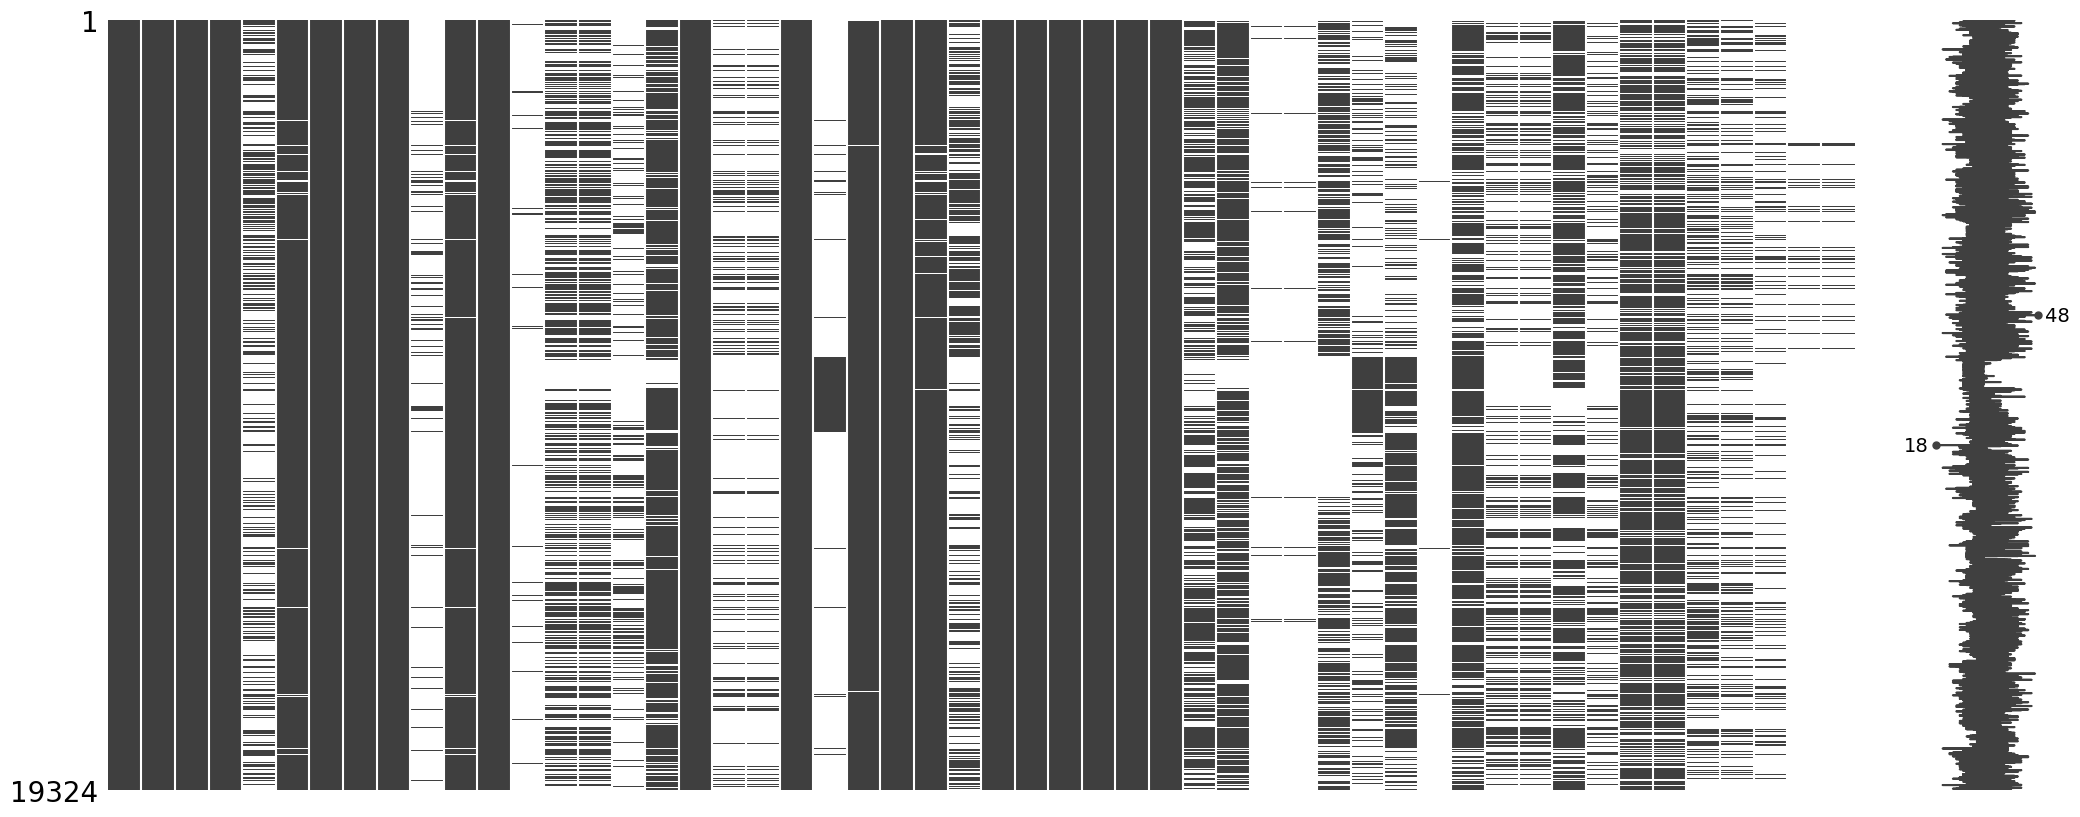

In [33]:
##visualisation of missing values

import missingno as msno
import matplotlib.pyplot as plt

##plot
msno.matrix(ten_yrs_data)
plt.show()

In [34]:
## remove columns with >50% missing values 
## remove cols - cum_dose_chr, cum_dose_unit, rechal, lot_num, exp_dt, nda_num,
## dose_amt, dose_unit, dose_freq, event_dt, auth_num, lit_ref, age_grp, to_mfr, drug_rec_act

##dop cols with more than 50% missing values
ten_yrs_data = ten_yrs_data.dropna(axis=1, thresh=len(ten_yrs_data)*0.5)

##display data
ten_yrs_data

,primaryid,caseid,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,mfr_sndr,...,prod_ai,val_vbm,route,dose_vbm,dechal,lot_num,nda_num,dose_form,indi_drug_seq,indi_pt
0,120963692,12096369,2,F,2020-03-26,2016-02-20,2020-03-31,EXP,US-ASTRAZENECA-2008BM06688,ASTRAZENECA,...,ORLISTAT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314962521,13149625,21,F,2020-02-18,2017-01-25,2020-03-02,EXP,CA-CELLTRION INC.-2017CA000780,CELLTRION,...,ORLISTAT,1,Unknown,"UNK, 1X/DAY",NaN,NaN,NaN,NaN,NaN,NaN
2,1352573513,13525735,13,F,2019-12-23,2017-05-09,2020-01-06,EXP,CA-ROCHE-1931885,ROCHE,...,LIRAGLUTIDE,1,Unknown,NaN,U,NaN,NaN,NaN,21.0,Product used for unknown indication
3,147306292,14730629,2,F,2020-02-27,2018-04-06,2020-03-09,EXP,GB-NOVOPROD-593576,NOVO NORDISK,...,LIRAGLUTIDE,1,Subcutaneous,1.8 MG,NaN,NaN,22341.0,SOLUTION FOR INJECTION,1.0,Diabetes mellitus
4,148324085,14832408,5,F,2020-01-14,2018-05-01,2020-01-22,EXP,US-ASTRAZENECA-2018SE50167,ASTRAZENECA,...,ORLISTAT,1,NaN,NaN,NaN,NaN,NaN,NaN,41.0,Weight decreased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19319,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,"0.6 MILLIGRAM, QD",D,NaN,NaN,INJECTION,NaN,NaN
19320,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,"1.8 MILLIGRAM, QD",D,NaN,NaN,INJECTION,NaN,NaN
19321,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,UNK UNK,D,NaN,NaN,INJECTION,NaN,NaN
19322,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,"1.8 MILLIGRAM, QD",D,NaN,NaN,INJECTION,NaN,NaN


In [36]:
##null values percentage
print((ten_yrs_data.isnull().sum()/len(ten_yrs_data)*100))

primaryid            0.000000
caseid               0.000000
caseversion          0.000000
i_f_code             0.000000
mfr_dt               2.013041
init_fda_dt          0.000000
fda_dt               0.000000
rept_cod             0.000000
mfr_num              2.245912
mfr_sndr             0.320845
age                 43.976402
age_cod             43.971227
sex                 14.536328
e_sub                0.000000
rept_dt              0.025875
occp_cod             0.776237
reporter_country     0.000000
occr_country         1.759470
pt                   0.000000
drug_seq             0.000000
role_cod             0.000000
drugname             0.000000
prod_ai              0.015525
val_vbm              0.000000
route               41.254399
dose_vbm            20.865245
dechal              43.303664
lot_num             44.436970
nda_num             24.353136
dose_form           35.230801
indi_drug_seq       21.051542
indi_pt             21.051542
dtype: float64


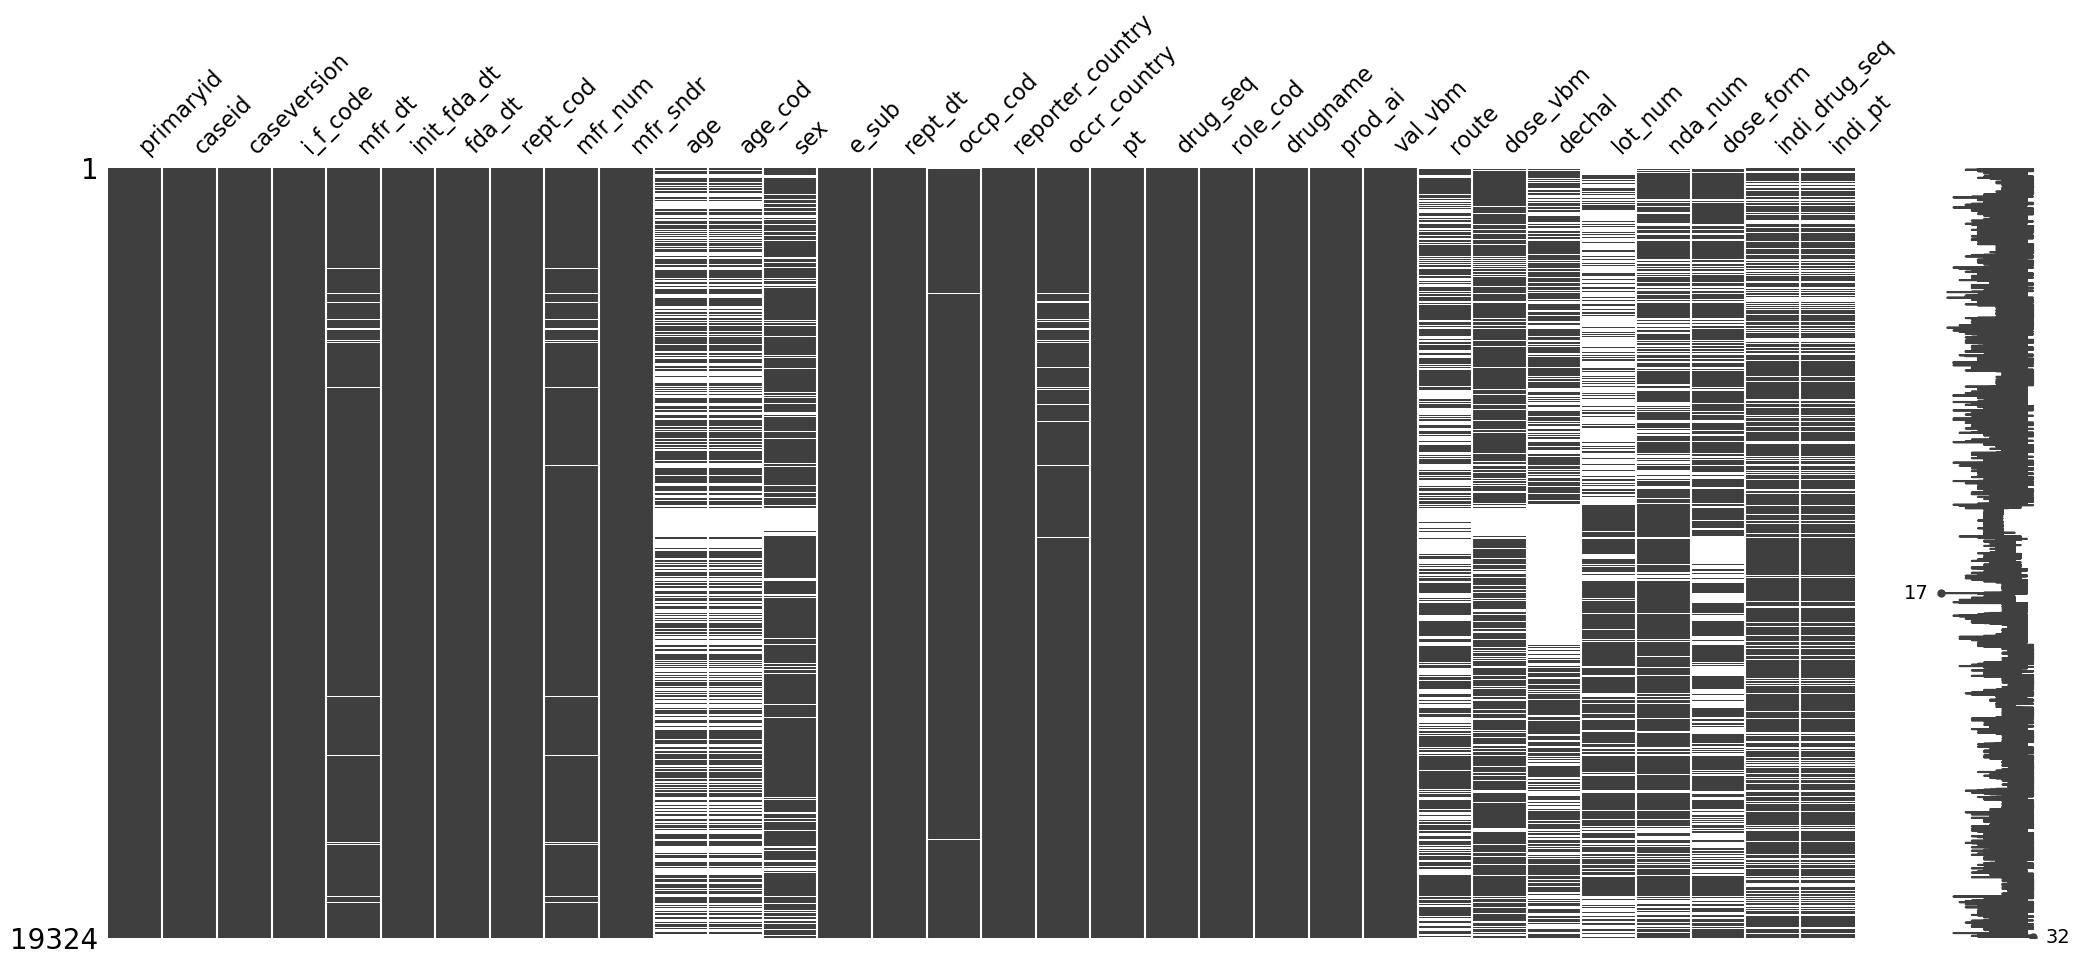

In [37]:
##visualise missing values
msno.matrix(ten_yrs_data)
plt.show()

In [40]:
##remove rows with less than 10% missing values

# Identify columns with less than 10% missing values
cols_below_10pct_missing = ten_yrs_data.columns[(ten_yrs_data.isnull().mean() > 0) & (ten_yrs_data.isnull().mean() <= 0.1)]

print(cols_below_10pct_missing)

Index(['mfr_dt', 'mfr_num', 'mfr_sndr', 'rept_dt', 'occp_cod', 'occr_country',
       'prod_ai'],
      dtype='object')


In [41]:
# Drop rows where these columns have missing values
ten_yrs_data = ten_yrs_data[~ten_yrs_data[cols_below_10pct_missing].isnull().any(axis=1)]

##display data
ten_yrs_data

,primaryid,caseid,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,mfr_sndr,...,prod_ai,val_vbm,route,dose_vbm,dechal,lot_num,nda_num,dose_form,indi_drug_seq,indi_pt
1,1314962521,13149625,21,F,2020-02-18,2017-01-25,2020-03-02,EXP,CA-CELLTRION INC.-2017CA000780,CELLTRION,...,ORLISTAT,1,Unknown,"UNK, 1X/DAY",NaN,NaN,NaN,NaN,NaN,NaN
2,1352573513,13525735,13,F,2019-12-23,2017-05-09,2020-01-06,EXP,CA-ROCHE-1931885,ROCHE,...,LIRAGLUTIDE,1,Unknown,NaN,U,NaN,NaN,NaN,21.0,Product used for unknown indication
3,147306292,14730629,2,F,2020-02-27,2018-04-06,2020-03-09,EXP,GB-NOVOPROD-593576,NOVO NORDISK,...,LIRAGLUTIDE,1,Subcutaneous,1.8 MG,NaN,NaN,22341.0,SOLUTION FOR INJECTION,1.0,Diabetes mellitus
5,151265324,15126532,4,F,2020-01-02,2018-07-10,2020-01-07,EXP,US-JNJFOC-20180709795,JOHNSON AND JOHNSON,...,LIRAGLUTIDE,1,Unknown,NaN,D,NaN,NaN,NaN,4.0,Product used for unknown indication
6,152211425,15221142,5,F,2020-01-22,2018-07-31,2020-01-30,EXP,PT-AUROBINDO-AUR-APL-2018-038679,AUROBINDO,...,ORLISTAT,1,Oral,"100 MILLIGRAM, ONCE A DAY",Y,NaN,NaN,CAPSULE,17.0,Weight decreased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19319,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,"0.6 MILLIGRAM, QD",D,NaN,NaN,INJECTION,NaN,NaN
19320,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,"1.8 MILLIGRAM, QD",D,NaN,NaN,INJECTION,NaN,NaN
19321,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,UNK UNK,D,NaN,NaN,INJECTION,NaN,NaN
19322,172138441,17213844,1,I,2019-12-16,2019-12-30,2019-12-30,EXP,CA-MYLANLABS-2019M1126884,MYLAN,...,LIRAGLUTIDE,1,Subcutaneous,"1.8 MILLIGRAM, QD",D,NaN,NaN,INJECTION,NaN,NaN


In [43]:
##null values percentage
print((ten_yrs_data.isnull().sum()/len(ten_yrs_data)*100))

primaryid            0.000000
caseid               0.000000
caseversion          0.000000
i_f_code             0.000000
mfr_dt               0.000000
init_fda_dt          0.000000
fda_dt               0.000000
rept_cod             0.000000
mfr_num              0.000000
mfr_sndr             0.000000
age                 45.142275
age_cod             45.136917
sex                 14.934891
e_sub                0.000000
rept_dt              0.000000
occp_cod             0.000000
reporter_country     0.000000
occr_country         0.000000
pt                   0.000000
drug_seq             0.000000
role_cod             0.000000
drugname             0.000000
prod_ai              0.000000
val_vbm              0.000000
route               40.828466
dose_vbm            19.002197
dechal              43.030920
lot_num             42.977332
nda_num             21.917368
dose_form           33.481593
indi_drug_seq       20.288302
indi_pt             20.288302
dtype: float64


In [45]:
ten_yrs_data['age_cod'].unique()

array([nan, 'YR', 'MON', 'DY', 'DEC', 'WK'], dtype=object)

In [46]:
ten_yrs_data['sex'].unique()

array([nan, 'M', 'F'], dtype=object)

In [47]:
ten_yrs_data['sex'].value_counts()

F    12470
M     3404
Name: sex, dtype: int64

In [48]:
ten_yrs_data['route'].unique()

array(['Unknown', 'Subcutaneous', 'Oral', nan, 'Parenteral', 'Other',
       'Transplacental', 'Intramuscular', 'Rectal', 'Cutaneous',
       'Endocervical', 'Topical', 'Intravenous (not otherwise specified)',
       'ORAL', 'UNKNOWN', 'SUBCUTANEOUS', 'TRANSPLACENTAL', 'Intradermal',
       'Sublingual'], dtype=object)

In [49]:
ten_yrs_data['dose_vbm'].unique()

array(['UNK, 1X/DAY', nan, '1.8 MG', ..., '0.6 MG, QD(IN MORNING)',
       '6 MG/DAY, 0-0-1-0', '2.4 MILLIGRAM, QD'], dtype=object)

In [50]:
ten_yrs_data['dechal'].unique()

array([nan, 'U', 'D', 'Y', 'N'], dtype=object)

In [51]:
ten_yrs_data['dechal'].value_counts()

U    6092
Y    3218
N     693
D     628
Name: dechal, dtype: int64

In [52]:
ten_yrs_data['lot_num'].unique()

array([nan, ' HZF8853', ' HZF9167', ' HZF9734', ' HP53325', ' JZFD436',
       ' HZF7574', ' JP51557', ' 9812', ' 15234', ' JP51913', ' JP50601',
       ' UNKNOWN', ' 104571XC', ' UNK', ' JP52967', ' 12356', ' 11495',
       ' 15994', ' 12355', ' 18200', ' 15233', ' 5790', ' 15615',
       ' JP51371', ' 8814', ' JP52255', ' JZFG794', ' JZFB266',
       ' 61906XB', ' HZF7917', ' HZF8459', ' HZF9443', ' HZFA728',
       ' HZFA073', ' HP53176', ' HZF6071', ' HZFA877', ' HZF7572',
       ' HZF5680', ' HZFA228', ' HZF7456', ' JZFD205', ' JP50740',
       ' JZFC391', ' GZF4087', ' HZF7049', ' JZF7572', ' JP51543',
       ' JZFB691', ' JZFF698', ' JZFF289', ' JZFE564', ' FZF0134',
       ' HP51867', ' HP50909', ' JZFD433', ' HZF7916', ' JZFB512',
       ' 9813', ' U NK', ' 11613', ' 104573XC', ' 5511', ' 18593',
       ' 10947', ' 5276', ' JP53459', ' JZFB511', ' JP53782', ' 18594',
       ' 5275', ' 5405', ' 18626', ' JP52643', ' 105463XB', ' 20184',
       ' KS6AK14', ' KZFJ179', ' JZFG972'

In [54]:
ten_yrs_data['nda_num'].value_counts()

206321.0       8190
21887.0        5897
20766.0         256
22341.0         224
198071001.0       2
75765.0           1
7157.0            1
Name: nda_num, dtype: int64

In [55]:
ten_yrs_data['dose_form'].unique()

array([nan, 'SOLUTION FOR INJECTION', 'CAPSULE', 'INJECTION', 'UNK',
       'UNKNOWN', 'FORMULATION UNKNOWN',
       'SOLUTION FOR INJECTION/INFUSION', 'TABLETS',
       'SOLN FOR INJECT IN PRE-FILLED SYRINGE',
       'SOLUTION FOR INJECTION IN PRE-FILLED PEN', 'UNSPECIFIED',
       'TABLET', 'CHEWABLE/DISPERSIBLE TABLET', 'CHEWABLE TABLET',
       'LIQUID', 'Solution for injection', 'Capsule', 'Injection',
       'Unknown', 'Solution for injection/infusion',
       'Solution for injection in pre-filled pen', 'Capsules', 'Solution',
       'Tablet', '5', 'Solution for injection in pre-filled syringe',
       'prefilled syringes', 'Infusion', 'Formulation unknown',
       'Chewable/dispersible tablet', 'Oromucosal suspension',
       'INJECTION, SOLUTION', 'PRE-FILLED SYRINGE', 'Capsule, hard',
       'CAPSULE, HARD', 'SOLUTION', 'GRANULES'], dtype=object)

In [56]:
ten_yrs_data['indi_drug_seq'].unique()

array([ nan,  21.,   1.,   4.,  17.,  35.,   5.,   6.,   7.,  14.,  15.,
        33.,  10.,   3.,   2.,   8.,  12.,   9.,  13.,  16.,  11.,  19.,
        50.,  18.,  52.,  20.,  43.,  22.,  84.,  26.,  39.,  29.,  31.,
        27.,  28.,  45.,  36.,  40., 122.,  49.,  55.,  80.,  25., 188.,
        34.,  24.,  37.,  76.,  57.,  23., 147.,  42., 140., 259., 136.,
       127., 151., 229.,  60.,  61.,  58., 142., 302., 129., 159.,  54.,
       189., 130.,  51.,  95., 153., 113., 178., 295., 141., 173.,  94.,
       116.,  30., 155., 194., 249., 503.,  32., 149., 201., 202., 154.,
       150., 262., 199., 177., 220., 320., 205.,  85., 218.,  53., 119.,
       111., 180., 175., 219., 261., 315.,  44.,  62., 216.,  87.,  64.,
        79., 107., 168., 169.,  47., 133., 512., 152., 183.,  65.,  66.,
       171., 209., 233., 234., 235., 118., 117.,  91.,  90., 309., 102.,
        71., 101.,  99., 135., 232., 182., 157., 372., 184., 214., 469.,
       210., 313., 167., 128.,  38.,  48.,  72.,  6

In [57]:
ten_yrs_data['indi_pt'].unique()

array([nan, 'Product used for unknown indication', 'Diabetes mellitus',
       'Weight decreased', 'Weight control', 'Obesity',
       'Type 2 diabetes mellitus', 'Hyperglycaemia', 'Weight loss diet',
       'Anxiety', 'Insulin resistance', 'Glucose tolerance impaired',
       'Overweight', 'Hypertension', 'Type 1 diabetes mellitus',
       'Glycosylated haemoglobin abnormal', 'Suicide attempt',
       'Blood glucose', 'Hyperlipidaemia', 'Abnormal weight gain',
       'Weight increased', 'Food craving', 'Polycystic ovaries',
       'Gastrooesophageal reflux disease', 'Body mass index increased',
       'Premenstrual syndrome', 'Constipation', 'Fat tissue decreased',
       'Pre-existing disease', 'Dyspepsia',
       'Insulin-requiring type 2 diabetes mellitus', 'Oedema',
       'Blood insulin abnormal', 'Diabetic neuropathy',
       'Blood glucose increased', 'Diabetes mellitus management',
       'Gastrointestinal disorder', 'Weight', 'Increased appetite',
       'Medical diet', 'Prop

In [60]:
##fill the missing values
ten_yrs_data_cpy = ten_yrs_data.copy()

##fill missing values of age_cod col with Unknown
ten_yrs_data_cpy['age_cod'].fillna('Unknown', inplace = True)

##fill missing values of sex col with Unknown
ten_yrs_data_cpy['sex'].fillna('Unknown', inplace = True)

##fill missing values of route col with Unknown
ten_yrs_data_cpy['route'].fillna('Unknown', inplace = True)

##fill missing values of dose_vbm col with UNK
ten_yrs_data_cpy['dose_vbm'].fillna('UNK', inplace = True)

##fill missing values of dechal col with Unknown
ten_yrs_data_cpy['dechal'].fillna('U', inplace = True)

##fill missing values of lot_num col with Unknown
ten_yrs_data_cpy['lot_num'].fillna('UNKNOWN', inplace = True)

##fill missing values of nda_num col with mode value
ten_yrs_data_cpy['nda_num'] = ten_yrs_data_cpy['nda_num'].fillna(ten_yrs_data_cpy['nda_num'].mode()[0])

##fill missing values of dose_form col with Unknown
ten_yrs_data_cpy['dose_form'].fillna('Unknown', inplace = True)

##fill missing values of age col with mean age
ten_yrs_data_cpy['age'] = ten_yrs_data_cpy['age'].fillna(ten_yrs_data_cpy['age'].mean())

##fill missing values of indi_drug_seq col with Unknown
ten_yrs_data_cpy['indi_drug_seq'].fillna('Unknown', inplace = True)

##fill missing values of indi_pt col with Unknown
ten_yrs_data_cpy['indi_pt'].fillna('Unknown', inplace = True)

In [61]:
##null value counts
print(ten_yrs_data_cpy.isnull().sum())

primaryid           0
caseid              0
caseversion         0
i_f_code            0
mfr_dt              0
init_fda_dt         0
fda_dt              0
rept_cod            0
mfr_num             0
mfr_sndr            0
age                 0
age_cod             0
sex                 0
e_sub               0
rept_dt             0
occp_cod            0
reporter_country    0
occr_country        0
pt                  0
drug_seq            0
role_cod            0
drugname            0
prod_ai             0
val_vbm             0
route               0
dose_vbm            0
dechal              0
lot_num             0
nda_num             0
dose_form           0
indi_drug_seq       0
indi_pt             0
dtype: int64


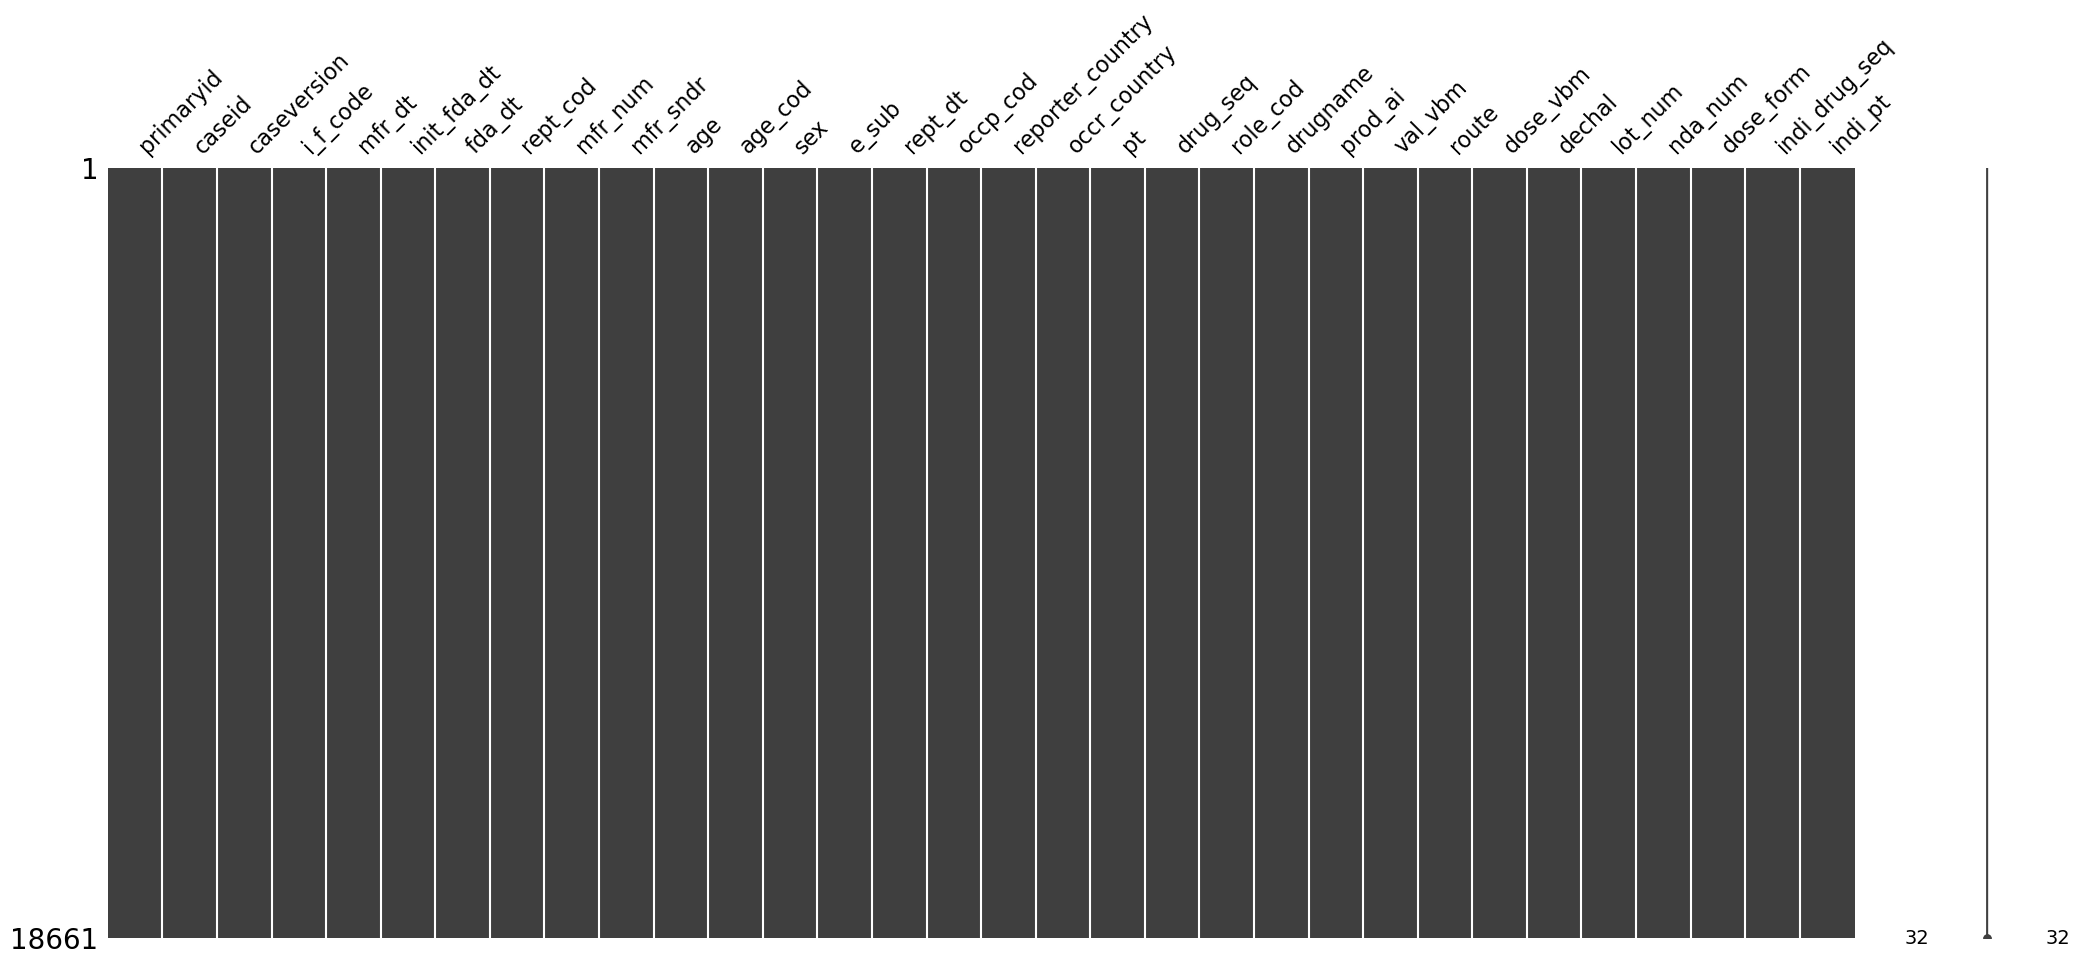

In [63]:
##visualise missing values
msno.matrix(ten_yrs_data_cpy)
plt.show()

In [66]:
##checking for possible duplicates

# Make a temporary copy with list columns converted to strings
df_temp = ten_yrs_data_cpy.copy()

# Convert all list-type columns to strings
for col in df_temp.columns:
    if df_temp[col].apply(lambda x: isinstance(x, list)).any():
        df_temp[col] = df_temp[col].apply(str)

# Now check for duplicates
print(df_temp.duplicated().sum())

0


In [67]:
##convert age to same unit -> year

##mapping function
def convert_age(row):
    
    if row['age_cod'] == 'YR': ##age is in years
        
        ##return yrs
        return row['age']
    
    elif row['age_cod'] == 'MON': ##age is in months
        
        ##convert months to yrs
        return row['age']/12
    
    elif row['age_cod'] == 'WK': ##age is in weeks
        
        ##convert weeks to years
        return row['age']/52
    
    elif row['age_cod'] == 'DY': ##age is in days
        
        ##convert days to yrs
        return row['age']/365
    
    elif row['age_cod'] == 'DEC': ##age is in decade
        
        ##convert decade to yrs
        return row['age']*10
        
    else:
        return None
    
##apply the mapping function to df
ten_yrs_data_cpy['age_in_yrs'] = ten_yrs_data_cpy.apply(convert_age, axis = 1)

In [69]:
ten_yrs_data_cpy.head()

,primaryid,caseid,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,mfr_sndr,...,val_vbm,route,dose_vbm,dechal,lot_num,nda_num,dose_form,indi_drug_seq,indi_pt,age_in_yrs
1,1314962521,13149625,21,F,2020-02-18,2017-01-25,2020-03-02,EXP,CA-CELLTRION INC.-2017CA000780,CELLTRION,...,1,Unknown,"UNK, 1X/DAY",U,UNKNOWN,206321.0,Unknown,Unknown,Unknown,NaN
2,1352573513,13525735,13,F,2019-12-23,2017-05-09,2020-01-06,EXP,CA-ROCHE-1931885,ROCHE,...,1,Unknown,UNK,U,UNKNOWN,206321.0,Unknown,21.0,Product used for unknown indication,44.0
3,147306292,14730629,2,F,2020-02-27,2018-04-06,2020-03-09,EXP,GB-NOVOPROD-593576,NOVO NORDISK,...,1,Subcutaneous,1.8 MG,U,UNKNOWN,22341.0,SOLUTION FOR INJECTION,1.0,Diabetes mellitus,63.0
5,151265324,15126532,4,F,2020-01-02,2018-07-10,2020-01-07,EXP,US-JNJFOC-20180709795,JOHNSON AND JOHNSON,...,1,Unknown,UNK,D,UNKNOWN,206321.0,Unknown,4.0,Product used for unknown indication,70.0
6,152211425,15221142,5,F,2020-01-22,2018-07-31,2020-01-30,EXP,PT-AUROBINDO-AUR-APL-2018-038679,AUROBINDO,...,1,Oral,"100 MILLIGRAM, ONCE A DAY",Y,UNKNOWN,206321.0,CAPSULE,17.0,Weight decreased,48.0


In [71]:
##cleaned data set shape
ten_yrs_data_cpy.shape

(18661, 33)

In [72]:
##save the cleaned data to csv file

##file path
csv_file = root_path+'Ten_years_data_cleaned.csv'

##save the file
ten_yrs_data_cpy.to_csv(csv_file, index = False)
print(f"Cleaned data save to {csv_file} path successfully.")

Cleaned data save to C:\Users\mulug\OneDrive\Documents\Datasets\Ten_years_data_cleaned.csv path successfully.


C:\Users\mulug\AppData\Local\Temp\ipykernel_16636\830949500.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ten_yrs_data_cpy['age_in_yrs'], shade = True, color = 'red')


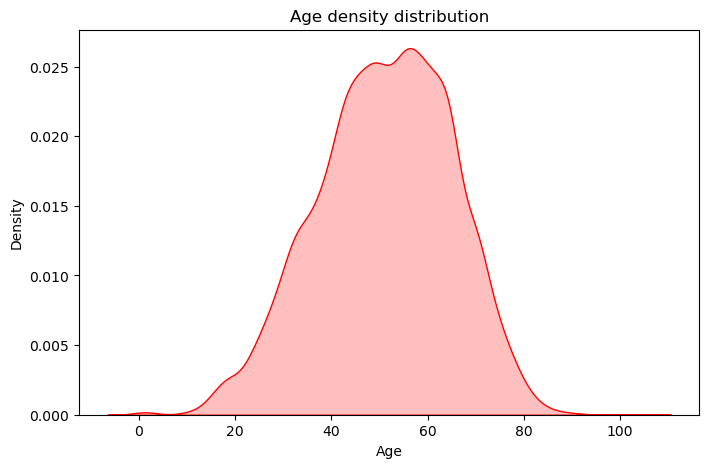

In [74]:
import seaborn as sns

#smoothed age distribution KDE plot
plt.figure(figsize = (8, 5))

sns.kdeplot(ten_yrs_data_cpy['age_in_yrs'], shade = True, color = 'red')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age density distribution')

plt.grid(False)
plt.show()

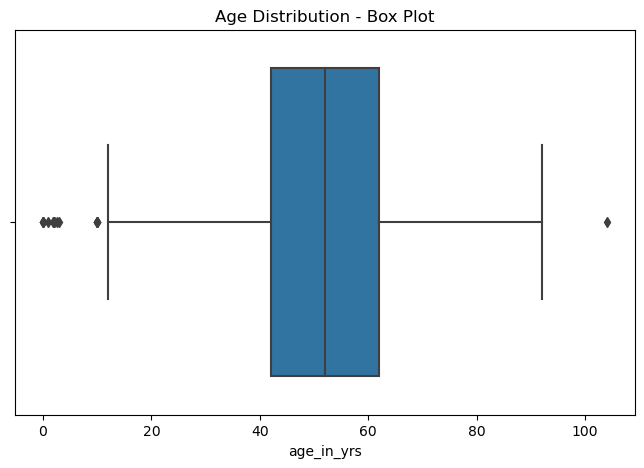

In [80]:
##check for possible outliers

##Boxplot for outlier detection
plt.figure(figsize = (8, 5))
sns.boxplot(x = ten_yrs_data_cpy['age_in_yrs'].dropna())
plt.title('Age Distribution - Box Plot')

plt.grid(False)
plt.show()

In [81]:
min(ten_yrs_data_cpy['age_in_yrs'].dropna())

0.0

In [82]:
max(ten_yrs_data_cpy['age_in_yrs'].dropna())

104.0

In [84]:
ten_yrs_data_cpy['age_in_yrs'].unique()

array([           nan, 4.40000000e+01, 6.30000000e+01, 7.00000000e+01,
       4.80000000e+01, 6.50000000e+01, 6.10000000e+01, 5.10000000e+01,
       5.80000000e+01, 3.50000000e+01, 2.90000000e+01, 6.70000000e+01,
       6.40000000e+01, 3.70000000e+01, 4.90000000e+01, 4.10000000e+01,
       2.60000000e+01, 6.00000000e+01, 5.30000000e+01, 5.40000000e+01,
       5.70000000e+01, 5.60000000e+01, 5.20000000e+01, 6.20958904e+01,
       4.20000000e+01, 7.60000000e+01, 2.10000000e+01, 4.30000000e+01,
       3.60000000e+01, 2.30000000e+01, 3.00000000e+01, 4.50000000e+01,
       5.50000000e+01, 4.00000000e+01, 6.80000000e+01, 7.10000000e+01,
       6.20000000e+01, 7.80000000e+01, 3.80000000e+01, 3.20000000e+01,
       7.50000000e+01, 8.92374719e+01, 8.70000000e+01, 6.60000000e+01,
       8.20000000e+01, 7.20000000e+01, 2.80000000e+01, 4.70000000e+01,
       7.40000000e+01, 1.80000000e+01, 4.60000000e+01, 5.00000000e+01,
       3.30000000e+01, 3.10000000e+01, 3.90000000e+01, 5.90000000e+01,
      

In [90]:
##frequency count of AEs

from collections import Counter

pt_series = ten_yrs_data_cpy['pt'].dropna()
pt_series = pt_series[pt_series.map(lambda x: len(x) > 0)]  # filter out empty lists

# Flatten and count
reaction_counts = Counter(
    reaction.strip()
    for reactions in pt_series
    for reaction in reactions
)

##Display reaction counts
reaction_df = pd.DataFrame.from_dict(reaction_counts, orient='index', columns=['count']).reset_index()
reaction_df.columns = ['reaction', 'count']
print(reaction_df.sort_values(by='count', ascending=False))

                reaction  count
116     Drug ineffective   3277
18                Nausea   2293
63             Diarrhoea   1448
25              Vomiting   1333
8       Weight increased    945
...                  ...    ...
2234      Meconium stain      1
2235  Precipitate labour      1
2236   Shoulder dystocia      1
2237          Orthopnoea      1
2837    Acoustic neuroma      1

[2838 rows x 2 columns]
